In [1]:
# Third-party imports
%matplotlib inline
import mxnet as mx
from mxnet import gluon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [5]:
import fbprophet

In [10]:
 fbprophet.Prophet?

In [2]:
from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
from gluonts.dataset.util import to_pandas

In [3]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['constant', 'exchange_rate', 'solar-energy', 'electricity', 'traffic', 'm4_hourly', 'm4_daily', 'm4_weekly', 'm4_monthly', 'm4_quarterly', 'm4_yearly']


In [5]:
dataset = get_dataset("m4_hourly", regenerate=True)

INFO:root:downloading and processing m4_hourly


saving time-series into /Users/ningxin/.mxnet/gluon-ts/datasets/m4_hourly/train/data.json
saving time-series into /Users/ningxin/.mxnet/gluon-ts/datasets/m4_hourly/test/data.json


In [12]:
dataset

TrainDatasets(metadata=MetaData(freq='H', target=None, feat_static_cat=[CategoricalFeatureInfo(name='feat_static_cat', cardinality='414')], feat_static_real=[], feat_dynamic_real=[], feat_dynamic_cat=[], prediction_length=48), train=<gluonts.dataset.common.FileDataset object at 0x1a1bdf7e90>, test=<gluonts.dataset.common.FileDataset object at 0x1a1d789890>)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


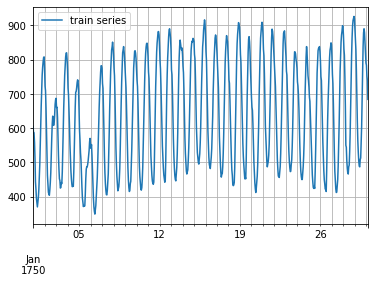

In [6]:
entry = next(iter(dataset.train))
train_series = to_pandas(entry)
train_series.plot()
plt.grid(which="both")
plt.legend(["train series"], loc="upper left")
plt.show()

In [15]:
train_series.shape

(700,)

In [20]:
df.tail()

,value
timestamp,
2015-04-22 20:32:53,51
2015-04-22 20:37:53,54
2015-04-22 20:42:53,46
2015-04-22 20:47:53,56
2015-04-22 20:52:53,50


INFO:root:Using CPU
INFO:root:Using CPU
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  8.69it/s, avg_epoch_loss=4.41]
INFO:root:Epoch[0] Elapsed time 5.757 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=4.406947
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.97it/s, avg_epoch_loss=4.1]
INFO:root:Epoch[1] Elapsed time 5.014 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=4.102625
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  8.79it/s, avg_epoch_loss=4.05]
INFO:root:Epoch[2] Elapsed time 5.697 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=4.045479
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.25it/s, avg_epoch_loss=4.02]
INFO:root:Epoch[3] Elapsed time 5.411 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=4.021268
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [

[51.868618 48.75312  42.949165 43.72321  42.184917 42.17723  41.691147
 43.085148 42.923447 41.435093 45.256092 43.386078]


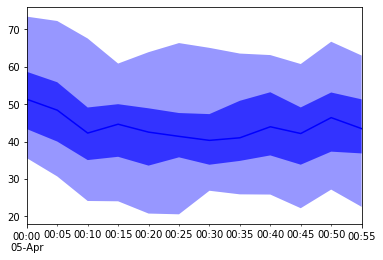

In [16]:
from gluonts.dataset import common
from gluonts.model import deepar
from gluonts.trainer import Trainer

import pandas as pd

url = "https://raw.githubusercontent.comb
/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv(url, header=0, index_col=0)
data = common.ListDataset([{"start": df.index[0],
                            "target": df.value[:"2015-04-05 00:00:00"]}],
                          freq="5min")

trainer = Trainer(epochs=10)
estimator = deepar.DeepAREstimator(freq="5min", prediction_length=12, trainer=trainer)
predictor = estimator.train(training_data=data)

prediction = next(predictor.predict(data))
print(prediction.mean)
prediction.plot(output_file='graph.png')

In [4]:
import fbprophet as prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.
